In [1]:
import openmc
import numpy as np
import tokamak_radiation_environment as tre

import matplotlib.pyplot as plt

In [2]:
iter_sp = openmc.StatePoint("../reactors/iter_class/example_statepoint.100.h5")
arc_sp = openmc.StatePoint("../reactors/arc_class/example_statepoint.030.h5")

In [3]:
# tally normalization
# to normalize over the mesh element volume
iter_meshvol = 1.6e4  # cm3
arc_meshvol = 4.48e3  # cm3

In [4]:
iter_tfcoil_spectrum = iter_sp.get_tally(id=4)
arc_tfcoil_spectrum = arc_sp.get_tally(id=4)

iter_spectrum_mean = iter_tfcoil_spectrum.mean[:,0,0]
arc_spectrum_mean = arc_tfcoil_spectrum.mean[:,0,0]

iter_spectrum_stddev = iter_tfcoil_spectrum.std_dev[:,0,0]
arc_spectrum_stddev = arc_tfcoil_spectrum.std_dev[:,0,0]

ebins = iter_tfcoil_spectrum.filters[2].bins[:,0]

In [5]:
# Specify the materials you want to plot cross sections for
ybco = tre.materials.ybco
nb3sn = tre.materials.nb3sn

In [6]:
reactions = ['(n,Xa)', '(n,Xp)', '(n,Xd)', '(n,Xt)']
E_hts, data_hts = openmc.calculate_cexs(ybco, reactions)
E_lts, data_lts = openmc.calculate_cexs(nb3sn, reactions)

[]

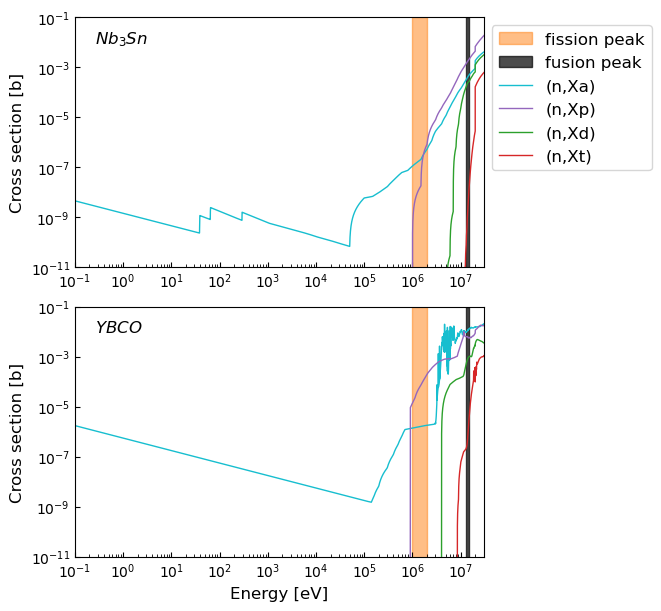

In [7]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6.5, 6), gridspec_kw={'height_ratios': [1, 1]}, constrained_layout=True)
ax1.fill_between([1e6, 2e6], [1e-1, 1e-1], color='tab:orange', alpha=0.5, label='fission peak')
ax1.fill_between([13e6, 15e6], [1e-1, 1e-1], color='k', alpha=0.7, label='fusion peak')
ax1.plot(E_lts, data_lts[0], lw=1, c='tab:cyan', label='(n,Xa)')
ax1.plot(E_lts, data_lts[1], lw=1, c='tab:purple', label='(n,Xp)')
ax1.plot(E_lts, data_lts[2], lw=1, c='tab:green', label='(n,Xd)')
ax1.plot(E_lts, data_lts[3], lw=1, c='tab:red', label='(n,Xt)')
ax1.set_xlim(1e-1, 3e7), ax1.set_ylim(1e-11, 1e-1)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel('Cross section [b]', fontsize=12)
ax1.legend(bbox_to_anchor=(1.00, 1.0), loc='upper left', ncols=1, fontsize=12)
ax1.tick_params(axis='both', which='both', direction='in')
ax1.tick_params(axis='y', which='minor', direction='in')
ax1.annotate('$Nb_3Sn$', [0.05, .95], xycoords='axes fraction', horizontalalignment='left',
            verticalalignment='top', fontsize=12, fontweight='bold')

ax2.fill_between([1e6, 2e6], [1e-1, 1e-1], color='tab:orange', alpha=0.5, label='fission peak')
ax2.fill_between([13e6, 15e6], [1e-1, 1e-1], color='k', alpha=0.7, label='fusion peak')
ax2.plot(E_hts, data_hts[0], lw=1, c='tab:cyan', label='hts-(n,Xa)')
ax2.plot(E_hts, data_hts[1], lw=1, c='tab:purple', label='hts-(n,Xp)')
ax2.plot(E_hts, data_hts[2], lw=1, c='tab:green', label='hts-(n,Xd)')
ax2.plot(E_hts, data_hts[3], lw=1, c='tab:red', label='hts-(n,Xt)')
ax2.set_xlim(1e-1, 3e7), ax2.set_ylim(1e-11, 1e-1)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel('Energy [eV]', fontsize=12)
ax2.set_ylabel('Cross section [b]', fontsize=12)
# ax2.legend(loc='upper center', fontsize=12)
ax2.tick_params(axis='both', which='both', direction='in')
ax2.tick_params(axis='y', which='minor', direction='in')
ax2.annotate('$YBCO$', [0.05, .95], xycoords='axes fraction', horizontalalignment='left',
            verticalalignment='top', fontsize=12, fontweight='bold')
# fig.tight_layout()
# plt.savefig('cross_sections.png', dpi=600)
plt.plot()

[]

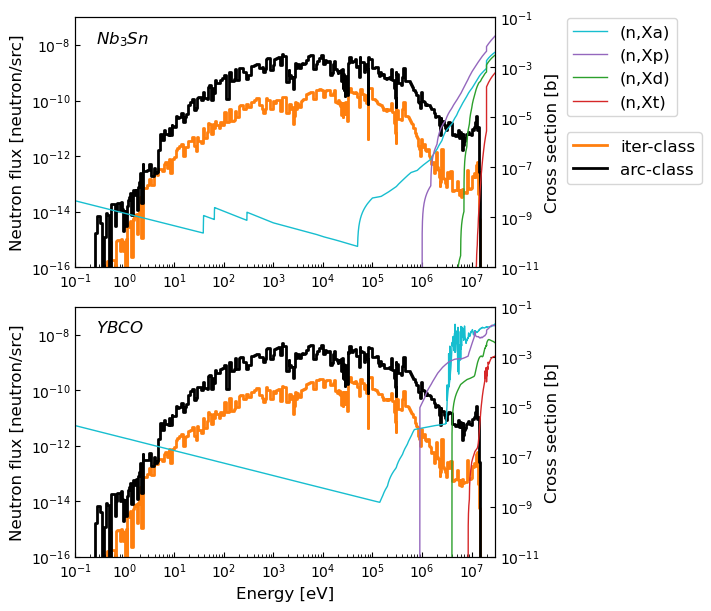

In [8]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(7, 6), gridspec_kw={'height_ratios': [1, 1]}, constrained_layout=True)
ax1.plot(ebins, iter_spectrum_mean/iter_meshvol, lw=2, ls='-', c='tab:orange', drawstyle='steps-pre', label='iter-class')
ax1.plot(ebins, arc_spectrum_mean/arc_meshvol, lw=2, ls='-', c='k', drawstyle='steps-pre', label='arc-class')
ax1.set_xlim(1e-1, 3e7), ax1.set_ylim(1e-16, 1e-7)
ax1.set_xscale('log'), ax1.set_yscale('log')
ax1.legend(bbox_to_anchor=(1.15, 0.3), loc='lower left', ncols=1, fontsize=12)
ax1.tick_params(axis='both', which='both', direction='in')
ax1.set_ylabel('Neutron flux [neutron/src]', fontsize=12)
ax1.tick_params(axis='both', which='both', direction='in')
ax3 = ax1.twinx()
ax3.plot(E_lts, data_lts[0], lw=1, c='tab:cyan', label='(n,Xa)')
ax3.plot(E_lts, data_lts[1], lw=1, c='tab:purple', label='(n,Xp)')
ax3.plot(E_lts, data_lts[2], lw=1, c='tab:green', label='(n,Xd)')
ax3.plot(E_lts, data_lts[3], lw=1, c='tab:red', label='(n,Xt)')
ax3.set_xlim(1e-1, 3e7), ax3.set_ylim(1e-11, 1e-1)
ax3.set_xscale('log'), ax3.set_yscale('log')
ax3.set_ylabel('Cross section [b]', fontsize=12)
ax3.legend(bbox_to_anchor=(1.15, 0.8), loc='center left', ncols=1, fontsize=12)
ax3.tick_params(axis='both', which='both', direction='in')
ax3.tick_params(axis='y', which='minor', direction='in')
ax3.annotate('$Nb_3Sn$', [0.05, .95], xycoords='axes fraction', horizontalalignment='left',
            verticalalignment='top', fontsize=12, fontweight='bold')


ax2.plot(ebins, iter_spectrum_mean/iter_meshvol, lw=2, ls='-', c='tab:orange', drawstyle='steps-pre', label='iter-class')
ax2.plot(ebins, arc_spectrum_mean/arc_meshvol, lw=2, ls='-', c='k', drawstyle='steps-pre', label='arc-class')
ax2.set_xlim(1e-1, 3e7), ax2.set_ylim(1e-16, 1e-7)
ax2.set_xscale('log'), ax2.set_yscale('log')
ax2.tick_params(axis='both', which='both', direction='in')
ax2.set_xlabel('Energy [eV]', fontsize=12)
ax2.set_ylabel('Neutron flux [neutron/src]', fontsize=12)
ax2.tick_params(axis='both', which='both', direction='in')
ax4 = ax2.twinx()
ax4.plot(E_hts, data_hts[0], lw=1, c='tab:cyan', label='hts-(n,Xa)')
ax4.plot(E_hts, data_hts[1], lw=1, c='tab:purple', label='hts-(n,Xp)')
ax4.plot(E_hts, data_hts[2], lw=1, c='tab:green', label='hts-(n,Xd)')
ax4.plot(E_hts, data_hts[3], lw=1, c='tab:red', label='hts-(n,Xt)')
ax4.set_xlim(1e-1, 3e7), ax4.set_ylim(1e-11, 1e-1)
ax4.set_xscale('log'), ax4.set_yscale('log')
ax4.set_ylabel('Cross section [b]', fontsize=12)
ax4.tick_params(axis='both', which='both', direction='in')
ax4.annotate('$YBCO$', [0.05, .95], xycoords='axes fraction', horizontalalignment='left',
            verticalalignment='top', fontsize=12, fontweight='bold')
# plt.savefig('arc_xs_vs_spectra.png', dpi=600)
plt.plot()